In [78]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))
plt.style.use('ggplot')

<Figure size 1500x1500 with 0 Axes>

In [79]:
new_path = os.path.join(os.getcwd(), 'data')
new_path
# 열고자 하는 파일과 그 파일의 경로를 입력
pathName = os.path.join(new_path, '5공정_180sec')
pathName

'D:\\IAIA\\Project\\PHM\\data\\5공정_180sec'

In [80]:
glob.glob(pathName+'/*')

dataList = list()
cnt = 0
for pth in glob.glob(pathName+'/*')[1 :]: # 에러 데이터를 제외하고 병합
    origin  = pd.read_csv(pth, index_col=False ) # read_csv를 이용해 파일을 읽어서 변수에 담는다
    origin['Date'] = "-".join(pth.split('-')[-1 ].split('.')[:-1 ]) # 날짜 데이터 추가
    cnt = cnt + len(origin) # 데이터 검증을 위한 row 누적코드
    dataList.append(origin)

In [81]:
CatList= pd.concat(dataList,axis=0 , ignore_index=True )
CatList

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06
...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27


In [82]:
df = CatList.copy()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    51084 non-null  int64  
 1   Process  51084 non-null  int64  
 2   Time     51084 non-null  object 
 3   Temp     51084 non-null  float64
 4   Current  51084 non-null  float64
 5   Date     51084 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [83]:
df = df[['Date','Process', 'Time', 'Temp', 'Current']]
for col in df.columns:
    percent = df[col].isnull().sum() / df[col].shape[0]
    msg='col:{:>20}\t Percent of NaN value: {:.2f}%'.format(col,100 * (percent))
    print(msg)

col:                Date	 Percent of NaN value: 0.00%
col:             Process	 Percent of NaN value: 0.00%
col:                Time	 Percent of NaN value: 0.00%
col:                Temp	 Percent of NaN value: 0.00%
col:             Current	 Percent of NaN value: 0.00%


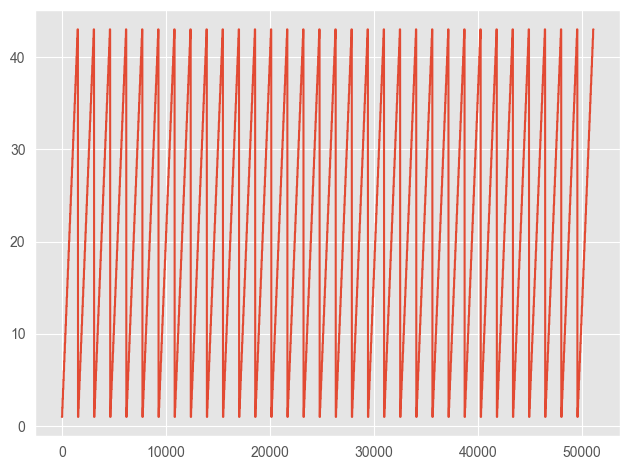

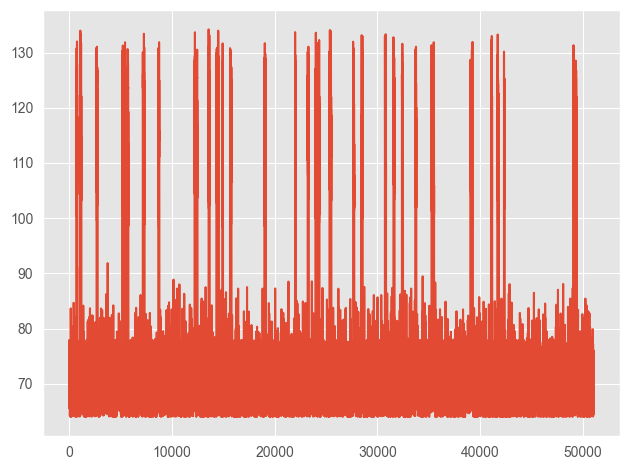

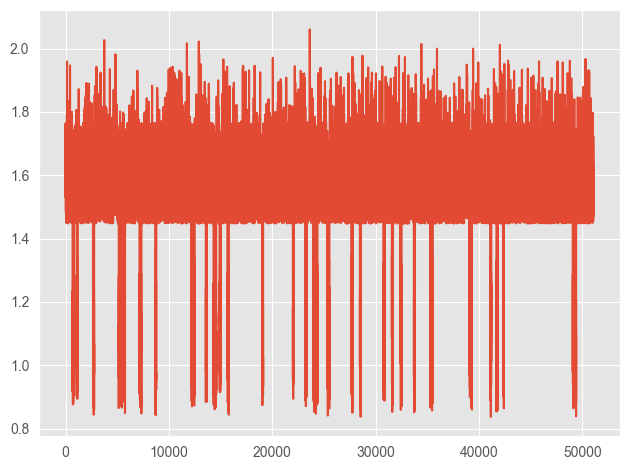

In [84]:
for i in df.columns:
    try :
        df[i].plot()
        plt.tight_layout()
        plt.show()
    except :pass

In [85]:
pick_data= df[df.columns[3:]]
pick_data.head(1)

,Temp,Current
0,75.139142,1.61


In [86]:
corr = pick_data.corr()
corr

,Temp,Current
Temp,1.000000,-0.733613
Current,-0.733613,1.000000


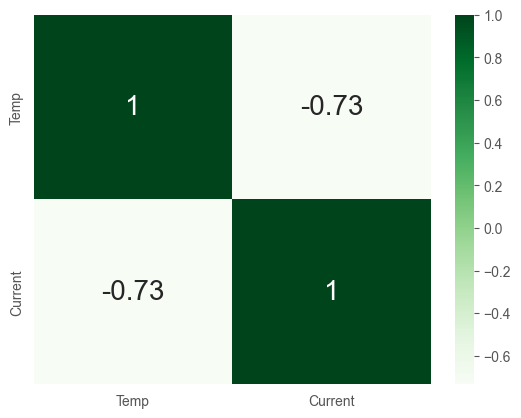

In [87]:
sns.heatmap(corr, annot=True , cmap='Greens', annot_kws={'size':20 })
plt.show()

In [88]:
df_er = pd.read_csv(glob.glob(pathName+'/*')[0 ], index_col=False )
df_er.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_err= df_er.transpose() # 전치
df_err

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_err.columns = df_err.iloc[0 ] # 데이터 컬럼 이름 변경
df_err


df_err =  df_err.iloc[1 :,:] # 필요 없는 row 제거
df_err

for col in df_err.columns:
    percent = df_err[col].isnull().sum() / df_err[col].shape[0]
    msg ='column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col,100 * (percent))
    print(msg)
    
    
df_err = df_err.fillna(0)
df_err.head()


column:           2021-09-06	 Percent of NaN value: 45.45%
column:           2021-09-07	 Percent of NaN value: 72.73%
column:           2021-09-08	 Percent of NaN value: 100.00%
column:           2021-09-09	 Percent of NaN value: 18.18%
column:           2021-09-10	 Percent of NaN value: 54.55%
column:           2021-09-13	 Percent of NaN value: 72.73%
column:           2021-09-14	 Percent of NaN value: 100.00%
column:           2021-09-15	 Percent of NaN value: 72.73%
column:           2021-09-16	 Percent of NaN value: 54.55%
column:           2021-09-17	 Percent of NaN value: 27.27%
column:           2021-09-23	 Percent of NaN value: 63.64%
column:           2021-09-24	 Percent of NaN value: 100.00%
column:           2021-09-27	 Percent of NaN value: 72.73%
column:           2021-09-28	 Percent of NaN value: 100.00%
column:           2021-09-29	 Percent of NaN value: 81.82%
column:           2021-09-30	 Percent of NaN value: 0.00%
column:           2021-10-01	 Percent of NaN value: 5

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,0,15.0,32.0,27.0,0,40.0,2.0,12.0,...,0,0,11.0,41.0,16.0,0,0,0,32.0,0
2,33.0,33.0,0,16.0,28.0,28.0,0,41.0,35.0,13.0,...,0,0,12.0,42.0,17.0,0,0,0,33.0,0
3,20.0,34.0,0,17.0,29.0,29.0,0,39.0,3.0,14.0,...,0,0,13.0,43.0,0.0,0,0,0,37.0,0
4,21.0,0.0,0,21.0,30.0,0.0,0,0.0,34.0,16.0,...,0,0,15.0,24.0,0.0,0,0,0,38.0,0
5,22.0,0.0,0,22.0,31.0,0.0,0,0.0,36.0,17.0,...,0,0,16.0,25.0,0.0,0,0,0,39.0,0


In [91]:
pick_data = df[df.columns[3 :]]
pick_data.head(1)

df[df['Process'] == df_err['2021-09-06'][0]]


,Date,Process,Time,Temp,Current
1116,2021-09-06,32,오후 6:08:15.6,120.673169,0.958032
1117,2021-09-06,32,오후 6:08:20.6,121.721175,1.098960
1118,2021-09-06,32,오후 6:08:25.6,123.522882,1.267960
1119,2021-09-06,32,오후 6:08:30.7,118.620181,1.062032
1120,2021-09-06,32,오후 6:08:35.7,133.402776,1.193891
...,...,...,...,...,...
50683,2021-10-27,32,오후 6:08:01.3,67.119377,1.532000
50684,2021-10-27,32,오후 6:08:06.3,65.121812,1.448000
50685,2021-10-27,32,오후 6:08:11.3,64.061976,1.519000
50686,2021-10-27,32,오후 6:08:16.3,66.086496,1.474000


In [92]:
pick_data['NG'] =0
for dt in df_err.columns:
    pick_DATE = df[df.Date ==dt]
    for i in range(len(df_err)):# len(df_err) : 11개 -> 한 날짜에 최대 에러 11개
        single_feature = df_err[dt][i]# 에러 루트 위치 검출
        if single_feature !=0 :
            c_inx = pick_DATE['Temp'][pick_DATE['Process'] == single_feature].index
            pick_data['NG'].loc[c_inx] =1
        else :pass
pick_data['NG'].value_counts()


NG
0    47088
1     3996
Name: count, dtype: int64

In [93]:
train_data = pick_data[:35604 ]
train_data.info()

test_data = pick_data[35604 :]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Temp     35604 non-null  float64
 1   Current  35604 non-null  float64
 2   NG       35604 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 834.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 35604 to 51083
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Temp     15480 non-null  float64
 1   Current  15480 non-null  float64
 2   NG       15480 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 362.9 KB


In [94]:
ng_idx_train = train_data[train_data['NG']== 1 ].index
ok_idx_train = train_data[train_data['NG']== 0 ].index
tNc_ok_train = train_data.loc[ok_idx_train]
tNc_ng_train = train_data.loc[ng_idx_train]

In [95]:
from sklearn.preprocessing import StandardScaler
train = tNc_ok_train
scaler = StandardScaler()
scaler = scaler.fit(train[['Temp']])
train['Temp'] = scaler.transform(train[['Temp']])

TIME_STEP=36
def create_sequences(X, y, time_steps =TIME_STEP):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
        # ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
X_train, Y_train = create_sequences(train[['Temp']], train[['Temp']])

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2 )
print(len(x_train))  


ss_data=StandardScaler().fit_transform(test_data[['Temp']])
print(ss_data)

X_data = pd.DataFrame()
X_data['Temp'] = list(ss_data.reshape(-1))

X_test, Y_test = create_sequences(X_data[['Temp']], test_data[['NG']])


def flatten(X):
 # sample x features array.
    flattened_X = np.empty((X.shape[0 ], X.shape[2 ]))  
    for i in range(X.shape[0 ]):
     flattened_X[i] = X[i, (X.shape[1 ]-1 ), :]
    return (flattened_X)


label = flatten(Y_test).reshape(-1)
label.shape

timesteps = X_train.shape[1]
features = X_train.shape[2]

25833
[[ 0.29003725]
 [ 0.02479778]
 [ 0.24064141]
 ...
 [-0.6138397 ]
 [-0.48704981]
 [-0.4455265 ]]


In [96]:
import keras
import tensorflow
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras import backend as K
from keras.layers import *
from keras.applications import imagenet_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

Lstm_AE_3 = Sequential()
# Encoder
Lstm_AE_3.add(LSTM(32,activation ='relu', input_shape =(timesteps, features), return_sequences =True))
Lstm_AE_3.add(LSTM(16,activation ='relu', return_sequences =False))
Lstm_AE_3.add(RepeatVector(timesteps))
# Decoder
Lstm_AE_3.add(LSTM(32, activation ='relu', return_sequences =True))
Lstm_AE_3.add(LSTM(16, activation ='relu',return_sequences =True))
Lstm_AE_3.add(TimeDistributed(Dense(features)))
Lstm_AE_3.summary()

from keras import backend as K
epochs =200
batch =128
lr =0.001
if K.image_data_format() =='channels_last':
    optimizer = keras.optimizers.Adam(lr)
    Lstm_AE_3.compile(loss='mse', optimizer =optimizer)
    history = Lstm_AE_3.fit(x_train, y_train,
                            epochs=epochs, batch_size =batch,
                            validation_data=(x_valid, y_valid))
else : pass

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVecto  (None, 36, 16)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 36, 32)            6272      
                                                                 
 lstm_3 (LSTM)               (None, 36, 16)            3136      
                                                                 
 time_distributed (TimeDist  (None, 36, 1)             17        
 ributed)                                               

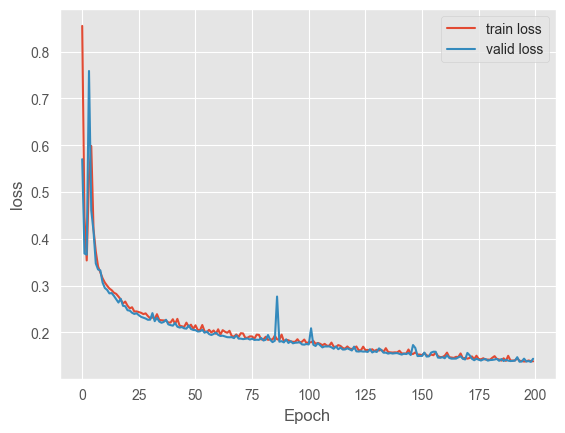

In [97]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()

In [98]:
epochs =200
batch =128
lr =0.001
Lstm_AE_3 = Sequential()
# Encoder
Lstm_AE_3.add(LSTM(140,activation ='relu', input_shape =(timesteps, features), return_sequences =True))
Lstm_AE_3.add(LSTM(70,activation ='relu', return_sequences =False))
Lstm_AE_3.add(RepeatVector(timesteps))
# Decoder
Lstm_AE_3.add(LSTM(70 , activation ='relu', return_sequences =True))
Lstm_AE_3.add(LSTM(140 , activation ='relu',return_sequences =True))
Lstm_AE_3.add(TimeDistributed(Dense(features)))
Lstm_AE_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 36, 140)           79520     
                                                                 
 lstm_5 (LSTM)               (None, 70)                59080     
                                                                 
 repeat_vector_1 (RepeatVec  (None, 36, 70)            0         
 tor)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 36, 70)            39480     
                                                                 
 lstm_7 (LSTM)               (None, 36, 140)           118160    
                                                                 
 time_distributed_1 (TimeDi  (None, 36, 1)             141       
 stributed)                                           

In [99]:
epochs = 50
batch = 32
lr = 0.001
Lstm_AE_3 = Sequential()
# Encoder
Lstm_AE_3.add(LSTM(140,activation='relu', input_shape=(timesteps, features), return_sequences=True))
Lstm_AE_3.add(LSTM(70,activation='relu', return_sequences=False))
Lstm_AE_3.add(RepeatVector(timesteps))
# Decoder
Lstm_AE_3.add(LSTM(70 , activation='relu', return_sequences=True))
Lstm_AE_3.add(LSTM(140 , activation='relu',return_sequences=True))
Lstm_AE_3.add(TimeDistributed(Dense(features)))
Lstm_AE_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 36, 140)           79520     
                                                                 
 lstm_9 (LSTM)               (None, 70)                59080     
                                                                 
 repeat_vector_2 (RepeatVec  (None, 36, 70)            0         
 tor)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 36, 70)            39480     
                                                                 
 lstm_11 (LSTM)              (None, 36, 140)           118160    
                                                                 
 time_distributed_2 (TimeDi  (None, 36, 1)             141       
 stributed)                                           

In [100]:
from keras import backend as K

if K.image_data_format() =='channels_last':
    optimizer = keras.optimizers.Adam(lr)
    Lstm_AE_3.compile(loss='mse', optimizer =optimizer)
    history = Lstm_AE_3.fit(x_train, y_train,
                            epochs=epochs, batch_size =batch,
                            validation_data=(x_valid, y_valid))
else:pass

Epoch 1/50
808/808 [==============================] - 102s 121ms/step - loss: 0.3847 - val_loss: 0.2824
Epoch 2/50
808/808 [==============================] - 154s 190ms/step - loss: 0.2669 - val_loss: 0.2548
Epoch 3/50
808/808 [==============================] - 155s 191ms/step - loss: 0.2454 - val_loss: 0.2180
Epoch 4/50
808/808 [==============================] - 157s 194ms/step - loss: 0.2257 - val_loss: 0.2085
Epoch 5/50
808/808 [==============================] - 170s 211ms/step - loss: 0.2147 - val_loss: 0.2197
Epoch 6/50
808/808 [==============================] - 118s 146ms/step - loss: 0.2114 - val_loss: 0.2019
Epoch 7/50
808/808 [==============================] - 91s 112ms/step - loss: 0.2022 - val_loss: 0.2015
Epoch 8/50
808/808 [==============================] - 90s 111ms/step - loss: 0.1960 - val_loss: 0.1968
Epoch 9/50
808/808 [==============================] - 99s 123ms/step - loss: 0.1996 - val_loss: 0.2228
Epoch 10/50
808/808 [==============================] - 89s 111ms/st

In [101]:
prediction = Lstm_AE_3.predict(X_test)
mse = np.mean(np.power(X_test - prediction, 2 ), axis=1 )

483/483 [==============================] - 14s 28ms/step


In [102]:
error_df = pd.DataFrame({'reconstruction_error': mse.reshape(-1 ),
             'true_class':label})
error_df.describe()

,reconstruction_error,true_class
count,15444.000000,15444.00000
mean,0.633188,0.04662
std,2.908610,0.21083
min,0.017262,0.00000
25%,0.051213,0.00000
50%,0.065457,0.00000
75%,0.086611,0.00000
max,86.289892,1.00000


11583


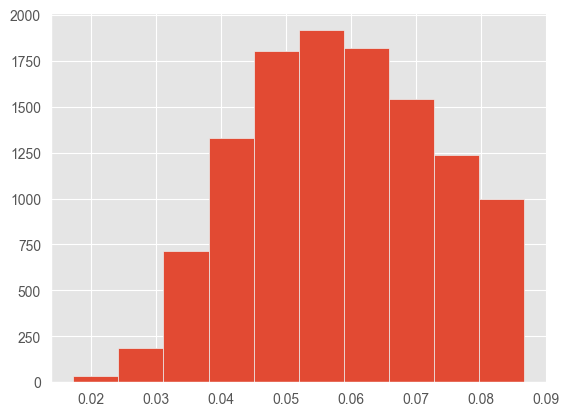

In [103]:
thr = np.percentile(mse.reshape(-1 ),75) # 75%
fig = plt.figure()
ax = fig.add_subplot(111 )
fraud_error_df = error_df[error_df['reconstruction_error'] <thr]
print(len(fraud_error_df))
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10 )

3861


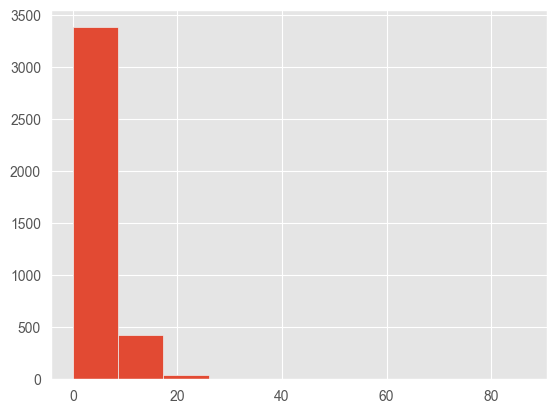

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['reconstruction_error'] >thr]
print(len(fraud_error_df))
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10 )

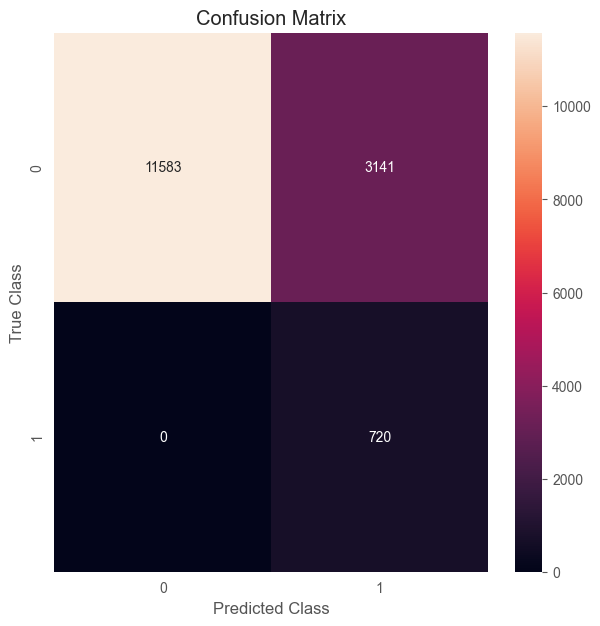

0.7866748166259169

In [108]:
from sklearn.metrics import *
pred_y = [1 if e >thr else 0 for e in error_df['reconstruction_error'].values]
conf_matrix = confusion_matrix(error_df['true_class'], pred_y)
plt.figure(figsize=(7 , 7 ))
sns.heatmap(conf_matrix, annot=True , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

TP = conf_matrix[0 ][0 ]
FN = conf_matrix[0 ][1 ]
FP = conf_matrix[1 ][0 ]
TN = conf_matrix[0 ][1 ]

Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
Accuracy = (TP + TN) / (TP + FP + FN + TN)
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)

Recall

In [107]:
Precision

1.0

In [109]:
Accuracy

0.8241813602015113

In [110]:
F1_Score

0.8806021211084503